In [133]:
import requests
import json
import pandas as pd 
from propagate import propagate_cr3bp, propagate_cr3bp_with_STM
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

In [41]:
r = requests.get("https://ssd-api.jpl.nasa.gov/periodic_orbits.api?sys=earth-moon&family=halo&libr=1&branch=N")

In [42]:
r = r.json()

In [43]:
import json
with open('data.json', 'w') as f:
    json.dump(r, f)

In [134]:
f = open('data.json',)
data = json.load(f)
print(type(data["data"]))

<class 'list'>


In [135]:
df = pd.DataFrame(data["data"])
df = df.astype(float)

In [136]:
row = df.loc[(df.iloc[:,7]-3.1).abs().argsort()[0]]

In [137]:
s0 = row[0:6]
mu = float(data["system"]["mass_ratio"])
tof = 3.1

In [138]:
pos, vel = propagate_cr3bp(s0, mu, tof, step=3000)

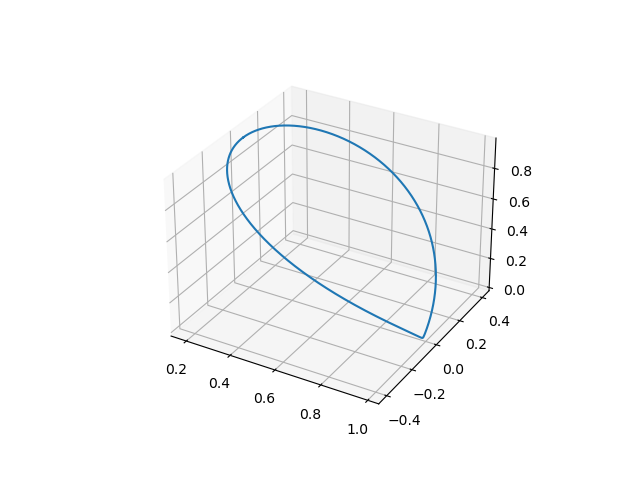

In [139]:
# Plot the orbits
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(pos[:,0], pos[:,1], pos[:,2])

plt.show()